<a href="https://colab.research.google.com/github/zhaoheng001/colabtogithubdemo/blob/master/Cifar10_CNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


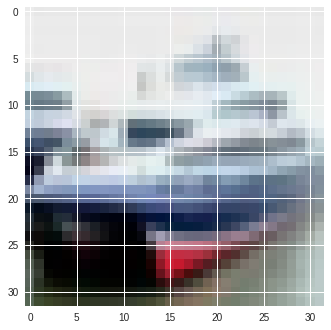

In [29]:
import time
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D
from keras.layers import Activation, Dense
from keras.callbacks import ModelCheckpoint
batch_size = 32 
num_classes = 10
epochs = 20
data_augmentation = False

from scipy.misc import toimage




# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

plt.imshow(toimage(x_test[1]))
#show image
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    plt.show()

def accuracy(x_test, y_test, model):
    result = model.predict(x_test)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(y_test, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 16, 32, 32)        448       
_________________________________________________________________
activation_19 (Activation)   (None, 16, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 16, 16)         1160      
_________________________________________________________________
activation_20 (Activation)   (None, 8, 16, 16)         0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 8)           0         
__________

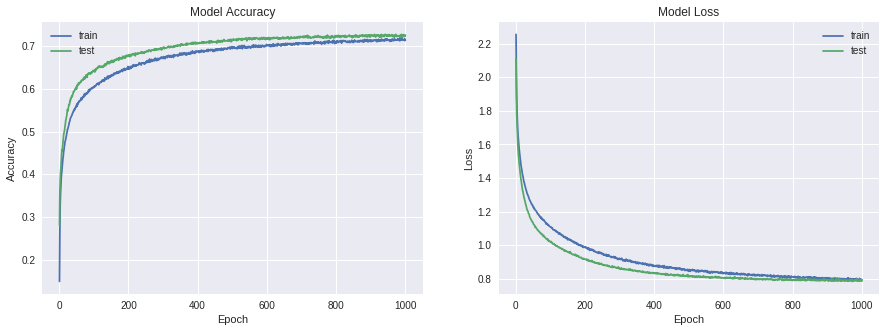

test_____________
10000/10000 [==============================] - 1s 56us/step


In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train_label = y_train
y_test_label = y_test
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), padding='same',
                                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary ()


# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=0.0001)

#checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             #monitor='val_loss', # quantity to monitor
                             #verbose=0, # verbosity - 0 or 1
                             #save_best_only= True, # The latest best model will not be overwritten
                             #mode='auto') 

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
                            optimizer=opt,
                            metrics=['accuracy'])

start = time.time()
from keras.utils import plot_model
plot_model(model, to_file='model.png')

print("train____________")
model_details = model.fit(x_train,y_train,epochs=1000,batch_size=128,validation_data = (x_test, y_test))

end = time.time()
plot_model_history(model_details)
print("test_____________")
#loss_train,acc_train=model.evaluate(x_train,y_train)
loss,acc=model.evaluate(x_test,y_test)

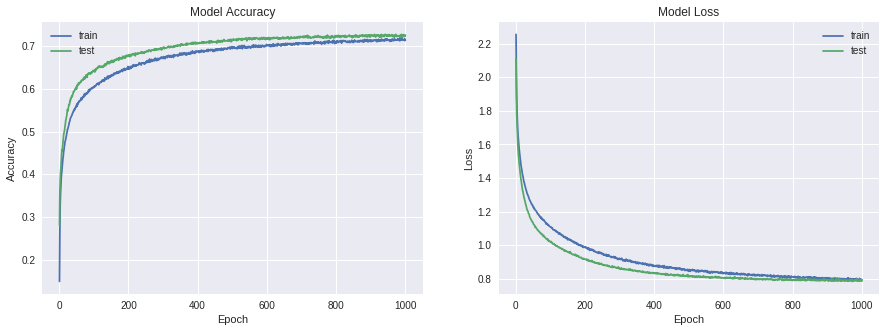

In [32]:
plot_model_history(model_details)

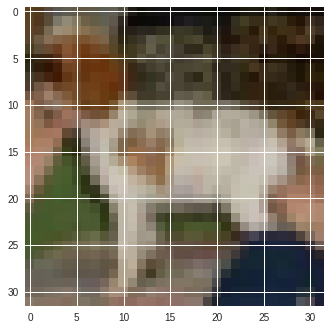

Corresponding classes for the labels: ['dog']
5


In [59]:
#print one image

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image_index = 12
img = x_test[image_index]
plt.imshow(np.transpose(np.reshape(img,(3, 32,32)), (1,2,0)))
plt.show()
#print('Corresponding classes for the labels: ' + str([cifar_classes[y_test[0]]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[np.argmax(y_test[image_index])]]))
print(np.argmax(y_test[image_index]))
#plt.imshow(x_test[1].reshape(32,32,3),cmap='Greys')

(1, 10000, 16, 32, 32)
(10000, 16, 32, 32)
(10000, 16384)
[ 0.27069923  0.59467685  0.61376655 ... -0.3290069  -0.31216127
 -0.22559644]
1.0005814
(16, 32, 32)
(32, 32, 16)


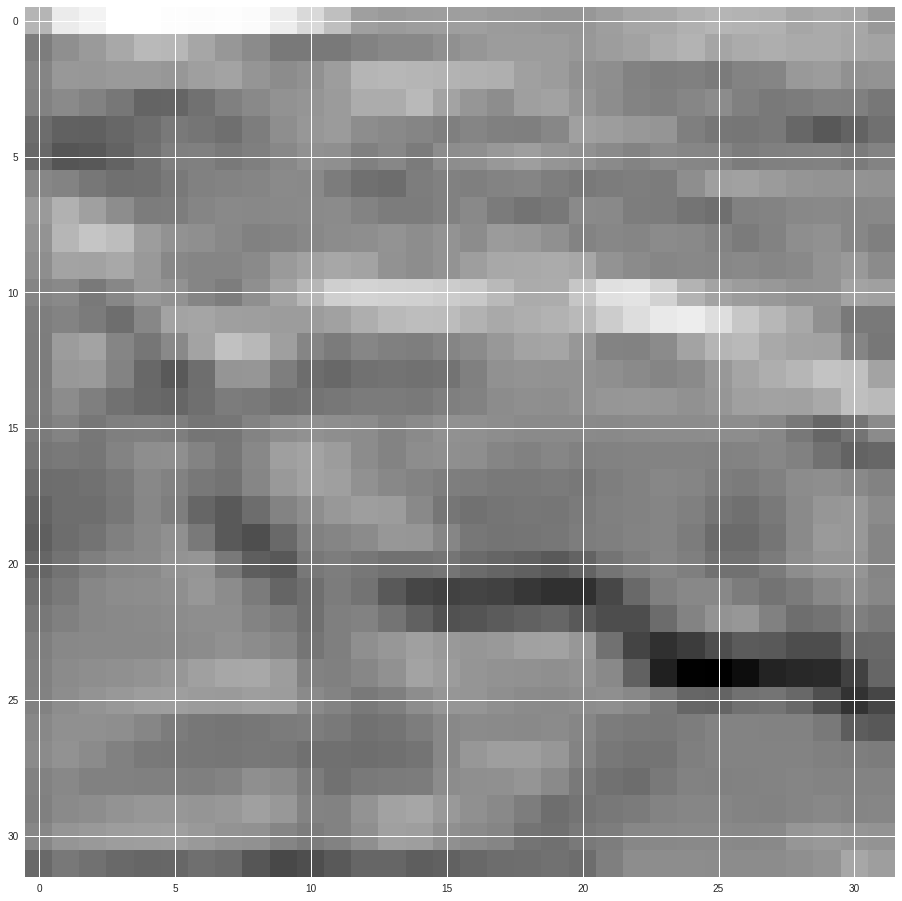

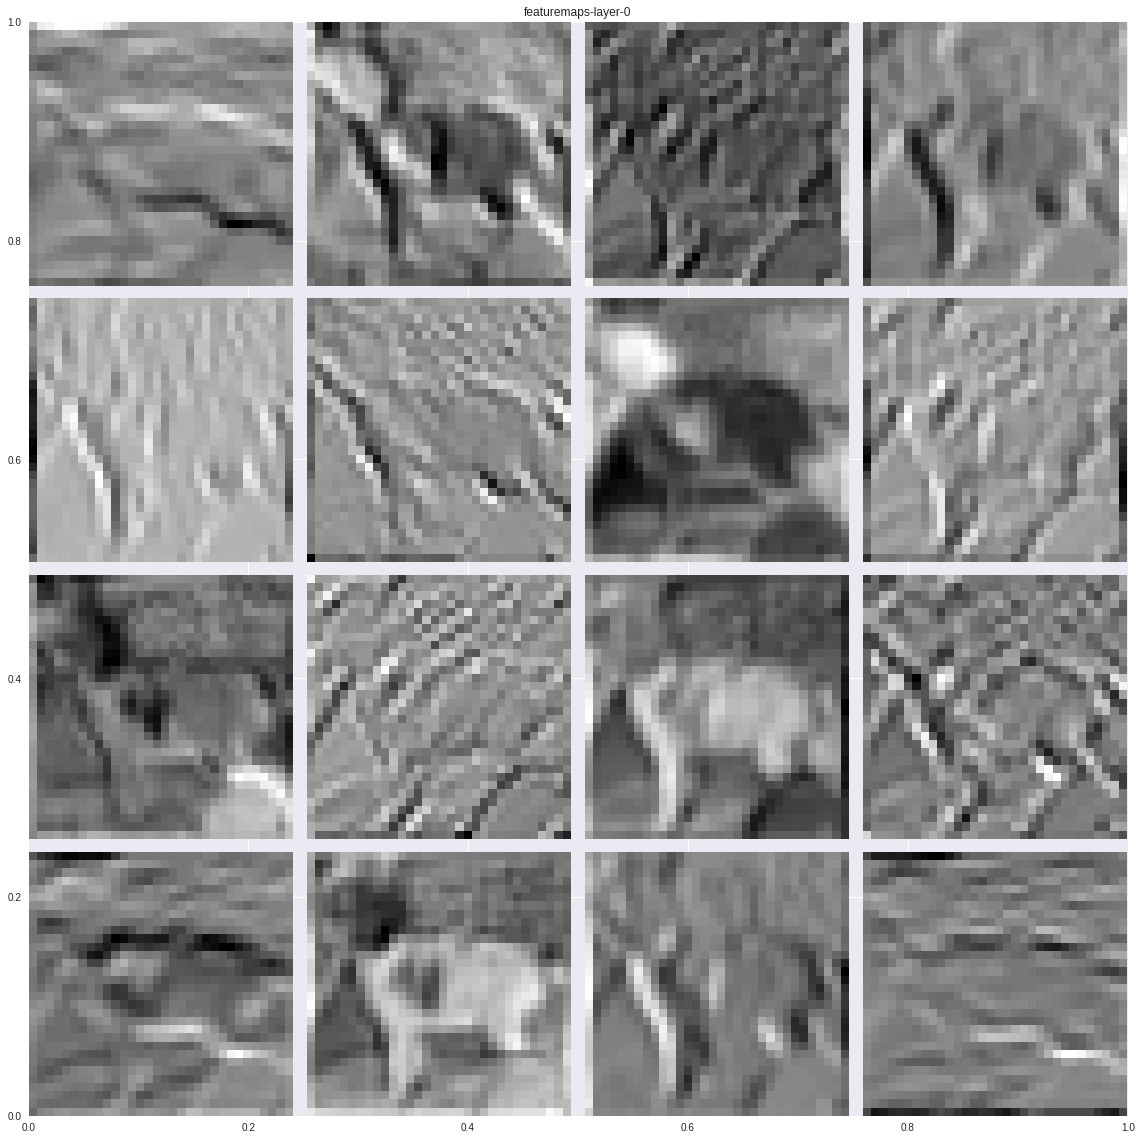

In [60]:
from keras import backend as K
K.set_image_dim_ordering('th')
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations
layer_num=0
filter_num=0

#save intermedium
activations = get_featuremaps(model, int(layer_num),x_test)#image number#x_test[image_index:]
print (np.shape(activations))
activation_all =  activations[0]
print(np.shape(activation_all))
activation_all_flatten = activation_all.reshape(10000,16384)
print(np.shape(activation_all_flatten))
print(activation_all_flatten[0])
print(max(activation_all_flatten[0]))
#np.savetxt('/Users/zhhh/Desktop/data_mining/HW3/intermedium.csv', activation_all_flatten[0], delimiter = ',')




#X = activation_all_flatten - np.mean(activation_all_flatten, axis=0) 
#Cov_X = np.cov(X.T) 
#eigenvalues, eigenvectors = np.linalg.eig(Cov_X) 
#Eig_decrease = sorted(eigenvalues, reverse=True) 
#Eig_decrease = Eig_decrease/sum(Eig_decrease) 
#plt.plot(Eig_decrease) 

#plt.title('percentage of first n eigenvalues')
#plt.plot(np.cumsum(Eig_decrease)) 
#plt.xlabel("n")
#plt.ylabel("percentage")








feature_maps = activations[0][image_index] 
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	 feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)


fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

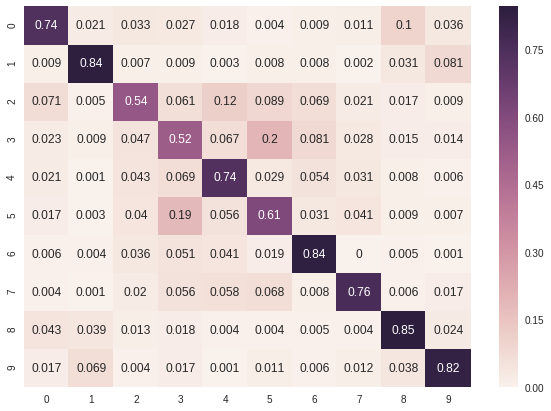

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
y_train_pred = model.predict(x_train, verbose=2)
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = model.predict(x_test, verbose=2)
y_test_pred = np.argmax(y_test_pred, axis=1)

conf_matrix_train = confusion_matrix(y_train_label,y_train_pred)
conf_matrix_test = confusion_matrix(y_test_label,y_test_pred)




import seaborn as sn
import pandas as pd
conf_matrix_test = conf_matrix_test/1000
df_cm_test = pd.DataFrame(conf_matrix_test, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_test, annot=True)

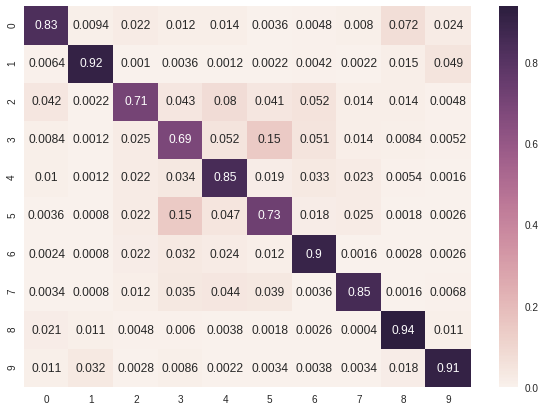

In [62]:
conf_matrix_train = conf_matrix_train/5000
df_cm_train = pd.DataFrame(conf_matrix_train, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_train, annot=True)